In [5]:
%pylab inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/figures/figures/'

Populating the interactive namespace from numpy and matplotlib


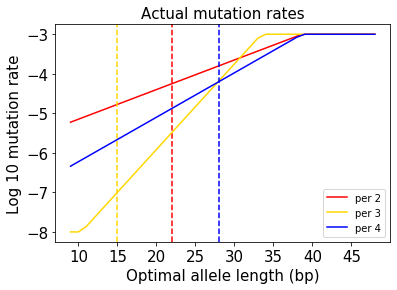

In [6]:
### Supplementary figure: Mutation rates ###

# Constants
MAX_LOG_MU = -3
MIN_LOG_MU = -8

# Dictionary of colors for each period
color_dic = {}
color_dic[1] = 'gray'
color_dic[2] = 'red'
color_dic[3] = 'gold'
color_dic[4] = 'blue'

# x and y axis
x = list(range(9, 49)) # X axis - optimal allele length
dic_y_axis = {} # Y axis - log 10 mutation rate

# Initialize dictionary of y axis lists
periods = [2,3,4]
for per in periods:
    dic_y_axis[per] = []
    
# Period information
period_info = {}

# mu, L, repeat unit corresponding to mu, filtering threshold
#period_info[1] = [10**-4.2, 0.04, 13, 20]
period_info[2] = [10**-5, 0.15, 6, 11]
period_info[3] = [10**-7, 0.65, 5, 5]
period_info[4] = [10**-6, 0.45, 3, 7]

for per in period_info:
    mu = period_info[per][0]
    L = period_info[per][1]
    ru = period_info[per][2]
    for elem in x:
    
        log_mu = np.log10(mu)+L*(elem/per-ru)
   
        if log_mu < MIN_LOG_MU:
            log_mu = MIN_LOG_MU

        if log_mu > MAX_LOG_MU:
            log_mu = MAX_LOG_MU

        dic_y_axis[per].append(log_mu)
  
plt.figure(1)
for per in dic_y_axis:
    plt.plot(x,dic_y_axis[per],label='per ' + str(per), color=color_dic[per])
    plt.axvline(x=period_info[per][3]*per, color=color_dic[per], linestyle = '--')
plt.xlabel('Optimal allele length (bp)', size=15)
plt.ylabel('Log 10 mutation rate', size=15)
plt.title('Actual mutation rates', size=15)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.legend()
plt.savefig(PLOTDIR + 'actual_mut_rates.pdf', bbox_inches='tight')